In [2]:
#importing libraries..

import pandas as pd
import pyspark
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [3]:
#loading DBpedia lat_longs.txt from s3 bucket
filepath = "s3a://geo-project-data/lat-long_data/lat_longs.txt"
df = sc.textFile(filepath).map(lambda x: x.split()).toDF()

In [3]:
df.show()

+------------------+------------------+--------------------+
|                _1|                _2|                  _3|
+------------------+------------------+--------------------+
|              36.7| 3.216666666666667|<http://dbpedia.o...|
|              42.5|1.5166666666666666|<http://dbpedia.o...|
|12.516666666666667|-70.03333333333333|<http://dbpedia.o...|
|-8.833333333333334|13.333333333333334|<http://dbpedia.o...|
|41.333333333333336|              19.8|<http://dbpedia.o...|
| 34.53333333333333| 69.13333333333334|<http://dbpedia.o...|
|40.416666666666664|49.833333333333336|<http://dbpedia.o...|
| 39.93333333333333| 32.86666666666667|<http://dbpedia.o...|
| 52.36666666666667|               4.9|<http://dbpedia.o...|
|             50.46|              2.13|<http://dbpedia.o...|
|17.116666666666667|            -61.85|<http://dbpedia.o...|
| 57.04638888888889| 9.919166666666667|<http://dbpedia.o...|
|             56.15|10.216666666666667|<http://dbpedia.o...|
|            34.929|    

In [4]:
#renaming columns for the spark dataframe

df = df.withColumnRenamed("_1", "Latitude").withColumnRenamed("_2", "Longitude").withColumnRenamed("_3", "name_of_page")

In [5]:
df.show()

+------------------+------------------+--------------------+
|          Latitude|         Longitude|        name_of_page|
+------------------+------------------+--------------------+
|              36.7| 3.216666666666667|<http://dbpedia.o...|
|              42.5|1.5166666666666666|<http://dbpedia.o...|
|12.516666666666667|-70.03333333333333|<http://dbpedia.o...|
|-8.833333333333334|13.333333333333334|<http://dbpedia.o...|
|41.333333333333336|              19.8|<http://dbpedia.o...|
| 34.53333333333333| 69.13333333333334|<http://dbpedia.o...|
|40.416666666666664|49.833333333333336|<http://dbpedia.o...|
| 39.93333333333333| 32.86666666666667|<http://dbpedia.o...|
| 52.36666666666667|               4.9|<http://dbpedia.o...|
|             50.46|              2.13|<http://dbpedia.o...|
|17.116666666666667|            -61.85|<http://dbpedia.o...|
| 57.04638888888889| 9.919166666666667|<http://dbpedia.o...|
|             56.15|10.216666666666667|<http://dbpedia.o...|
|            34.929|    

In [ ]:
#Save the extracted data to comma delimited text files in S3.

df.write.csv("s3a://geo-project-data/datafiles/dbpedia", header = True)

# Visualization

In [8]:
#converting spark dataframe to pandas
df_pd = df.toPandas()

In [10]:
df_pd.head()

,Latitude,Longitude,name_of_page
0,36.7,3.216666666666667,<http://dbpedia.org/resource/Algeria>
1,42.5,1.5166666666666666,<http://dbpedia.org/resource/Andorra>
2,12.516666666666667,-70.03333333333333,<http://dbpedia.org/resource/Aruba>
3,-8.833333333333334,13.333333333333334,<http://dbpedia.org/resource/Angola>
4,41.333333333333336,19.8,<http://dbpedia.org/resource/Albania>


In [15]:
#importing libraries..

import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import descartes

In [11]:
#converting latitude and longitude values to float which are previously in u'coding
latitude = []
longitude = []
for i,j in zip(df_pd.Latitude,df_pd.Longitude):
    latitude.append(float(i))
    longitude.append(float(j))

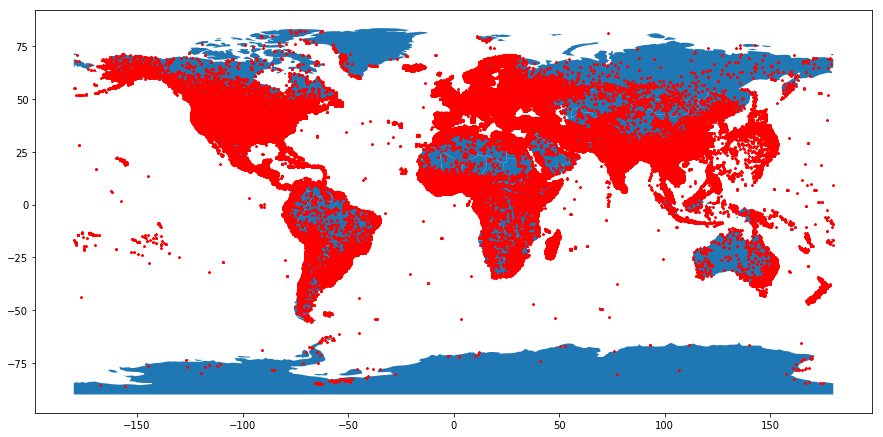

In [13]:
#plotting map using geopandas

#create geometry of latitude and longitudes
#create geopandas dataframes, one for world and other for our data

gdf = gpd.GeoDataFrame(df_pd, geometry=gpd.points_from_xy(longitude, latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#plotting world map
ax = world.plot(figsize=(15,15))

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red',figsize=(15,15), marker='*', markersize=5)

plt.show()

Boundary box

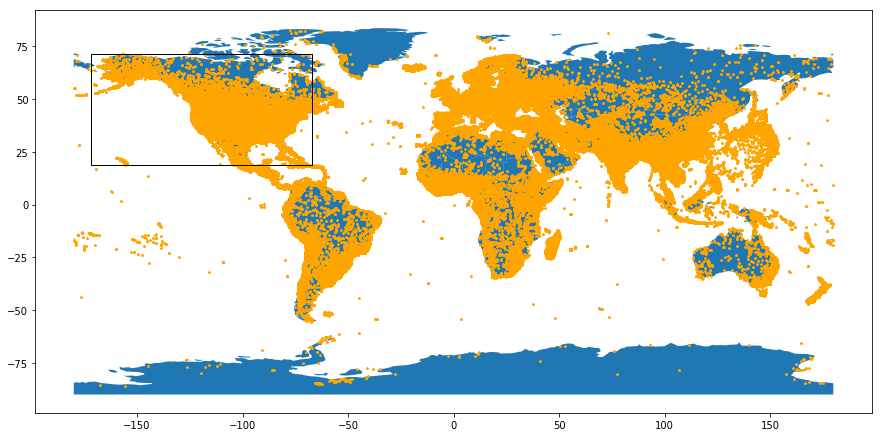

In [14]:
#united states map..

gdf = gpd.GeoDataFrame(df_pd, geometry=gpd.points_from_xy(longitude, latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15,15))

BBox = world[world.iso_a3 == 'USA'].envelope

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='orange',figsize=(15,15), marker='*', markersize=5)
BBox.plot(ax=ax,edgecolor = 'black', facecolor = 'none', )

plt.show()

# filter USA

USA boundary box coordinates: (-124.848974, 24.396308) - (-66.885444, 49.384358)

In [6]:
#Filtering out locations with in boundary box
USAdf = df.filter(((df.Latitude <= 49.384358) & (df.Latitude >= 24.396308))& ((df.Longitude <= -66.885444) & (df.Longitude >= -124.848974)))
USApd = USAdf.toPandas()

In [7]:
#Save the USA data to comma delimited text files in S3.

USAdf.write.csv("s3a://geo-project-data/datafiles/dbpedia_USA", header = True)

In [8]:
USApd.head(10)

,Latitude,Longitude,name_of_page
0,42.03472222222222,-93.62,"<http://dbpedia.org/resource/Ames,_Iowa>"
1,46.18888888888889,-123.82111111111111,"<http://dbpedia.org/resource/Astoria,_Oregon>"
2,30.25,-97.75,"<http://dbpedia.org/resource/Austin,_Texas>"
3,42.28138888888889,-83.74833333333333,"<http://dbpedia.org/resource/Ann_Arbor,_Michigan>"
4,40.690444444444445,-73.99513888888889,<http://dbpedia.org/resource/Cobble_Hill_Tunnel>
5,37.235,-115.81111111111112,<http://dbpedia.org/resource/Area_51>
6,42.24666666666667,-84.75333333333333,"<http://dbpedia.org/resource/Albion,_Michigan>"
7,45.46472222222222,-98.48638888888888,"<http://dbpedia.org/resource/Aberdeen,_South_D..."
8,37.75611111111111,-122.27444444444444,"<http://dbpedia.org/resource/Alameda,_California>"
9,40.26305555555555,-85.6763888888889,"<http://dbpedia.org/resource/Alexandria,_Indiana>"


In [13]:
#converting latitude and longitude values to float
latitude = []
longitude = []
for i,j in zip(USApd.Latitude,USApd.Longitude):
    latitude.append(float(i))
    longitude.append(float(j))

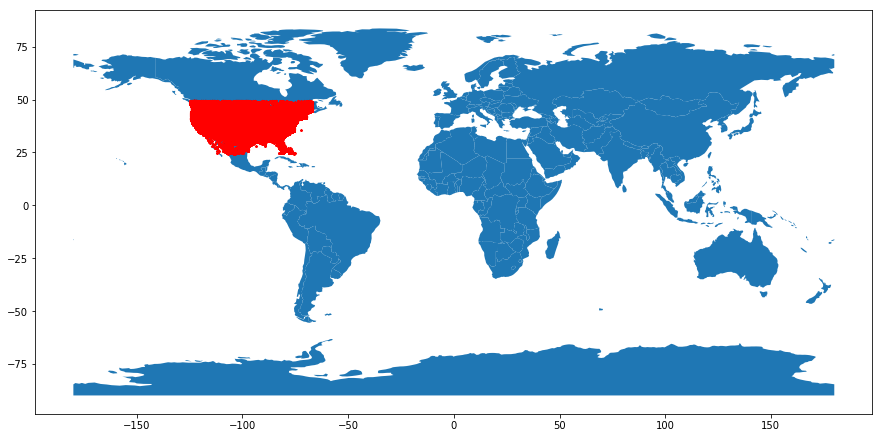

In [16]:
#plotting map using geopandas 
#create geometry of latitude and longitudes
#create geopandas dataframes, one for world and other for our data

gdf = gpd.GeoDataFrame(USApd, geometry=gpd.points_from_xy(longitude, latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15,15))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red',figsize=(15,15), marker='*', markersize=5)

plt.show()

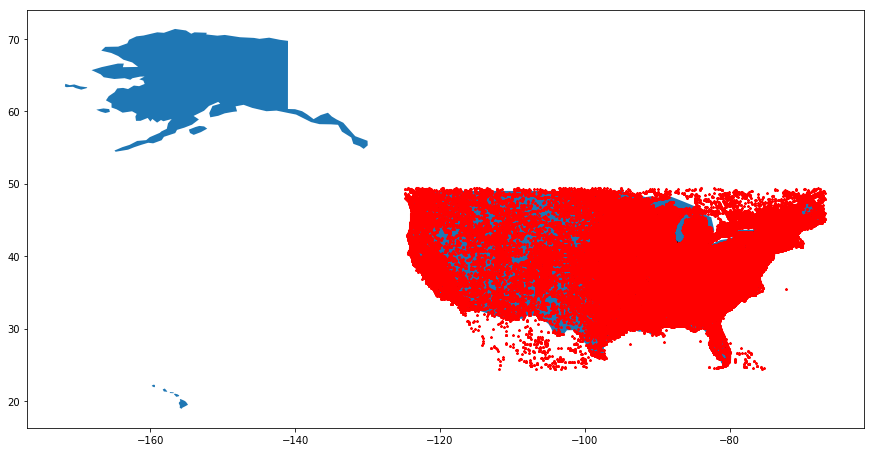

In [17]:
#plotting map using geopandas

#create geometry of latitude and longitudes
#create geopandas dataframes, one for USA map and other for our data

gdf = gpd.GeoDataFrame(USApd, geometry=gpd.points_from_xy(longitude, latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.iso_a3 == 'USA'].plot(figsize=(15,15))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red',figsize=(15,15), marker='*', markersize=5)

plt.show()